In [67]:
import os
import pickle
import re
import pandas as pd
import numpy as np
import pymorphy2
from functools import lru_cache

import fasttext
# https://stackoverflow.com/questions/17568612/how-to-make-numpy-argmax-return-all-occurrences-of-the-maximum

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 10, 5

sns.set(style='darkgrid')
sns.set(font_scale=1.5)

In [36]:
all_fasttext = pd.read_csv('data/model/0.97_250_all_metrics.csv').reset_index()
all_fasttext['model'] = 'fasttext adapted'
all_fasttext.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
123,123,0.336404,0.691170,0.243536,250,0,1223,31000,fasttext adapted
124,124,0.333818,0.713633,0.236808,250,0,1223,31250,fasttext adapted
125,125,0.363896,0.738934,0.264737,250,0,1223,31500,fasttext adapted
126,126,0.326438,0.730856,0.226360,250,0,1223,31750,fasttext adapted
127,127,0.368577,0.799252,0.257037,236,0,1223,31986,fasttext adapted


In [35]:
all_minilm = pd.read_csv('data/model/0.75_250_all_metrics.csv').reset_index()
all_minilm['model'] = 'minilm -'
all_minilm.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
123,123,0.342300,0.688637,0.247680,250,0,1373,31000,minilm -
124,124,0.356075,0.695584,0.262903,250,0,1374,31250,minilm -
125,125,0.395725,0.758740,0.293439,250,0,1374,31500,minilm -
126,126,0.411622,0.792775,0.302558,250,0,1376,31750,minilm -
127,127,0.415970,0.818377,0.303351,83,0,1376,31833,minilm -


In [38]:
all_ = pd.concat([all_fasttext, all_minilm], ignore_index=True)
all_

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
0,0,0.105333,0.308000,0.064800,250,1,0,250,fasttext adapted
1,1,0.183467,0.532000,0.112833,250,4,0,500,fasttext adapted
2,2,0.195778,0.540000,0.121700,250,1,0,750,fasttext adapted
3,3,0.237659,0.584000,0.161822,250,1,0,1000,fasttext adapted
4,4,0.233635,0.593333,0.153041,250,2,0,1250,fasttext adapted
...,...,...,...,...,...,...,...,...,...
251,123,0.342300,0.688637,0.247680,250,0,1373,31000,minilm -
252,124,0.356075,0.695584,0.262903,250,0,1374,31250,minilm -
253,125,0.395725,0.758740,0.293439,250,0,1374,31500,minilm -
254,126,0.411622,0.792775,0.302558,250,0,1376,31750,minilm -


In [52]:
model_fasttext = pd.read_csv('data/model/0.97_250_marked_metrics.csv').reset_index()
model_fasttext['model'] = 'fasttext adapted'
model_fasttext.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
16,16,0.601816,0.613683,0.595944,15,15,999,14500,fasttext adapted
17,17,0.540277,0.556318,0.532304,11,11,1010,14750,fasttext adapted
18,18,0.580698,0.590000,0.576083,15,15,1025,15000,fasttext adapted
19,19,0.662547,0.670995,0.658351,15,15,1054,17000,fasttext adapted
20,20,0.424219,0.430136,0.421282,34,34,1213,28750,fasttext adapted


In [53]:
model_minilm = pd.read_csv('data/model/0.75_250_marked_metrics.csv').reset_index()
model_minilm['model'] = 'minilm -'
model_minilm.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
24,24,0.899911,0.899911,0.899911,12,12,1187,23750,minilm -
25,25,0.945071,0.945071,0.945071,11,11,1218,25500,minilm -
26,26,0.643565,0.643565,0.643565,70,70,1325,28500,minilm -
27,27,0.811597,0.811597,0.811597,13,13,1351,29500,minilm -
28,28,0.818387,0.818387,0.818387,18,18,1370,30000,minilm -


In [55]:
model = pd.concat([model_fasttext, model_minilm], ignore_index=True)
model.head()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
0,0,0.742991,0.747664,0.740654,214,214,214,3500,fasttext adapted
1,1,0.573347,0.584943,0.567549,90,90,304,3750,fasttext adapted
2,2,0.533465,0.548550,0.525923,115,115,419,4000,fasttext adapted
3,3,0.436676,0.459702,0.425407,114,114,533,4250,fasttext adapted
4,4,0.407318,0.441157,0.391385,92,92,625,4500,fasttext adapted


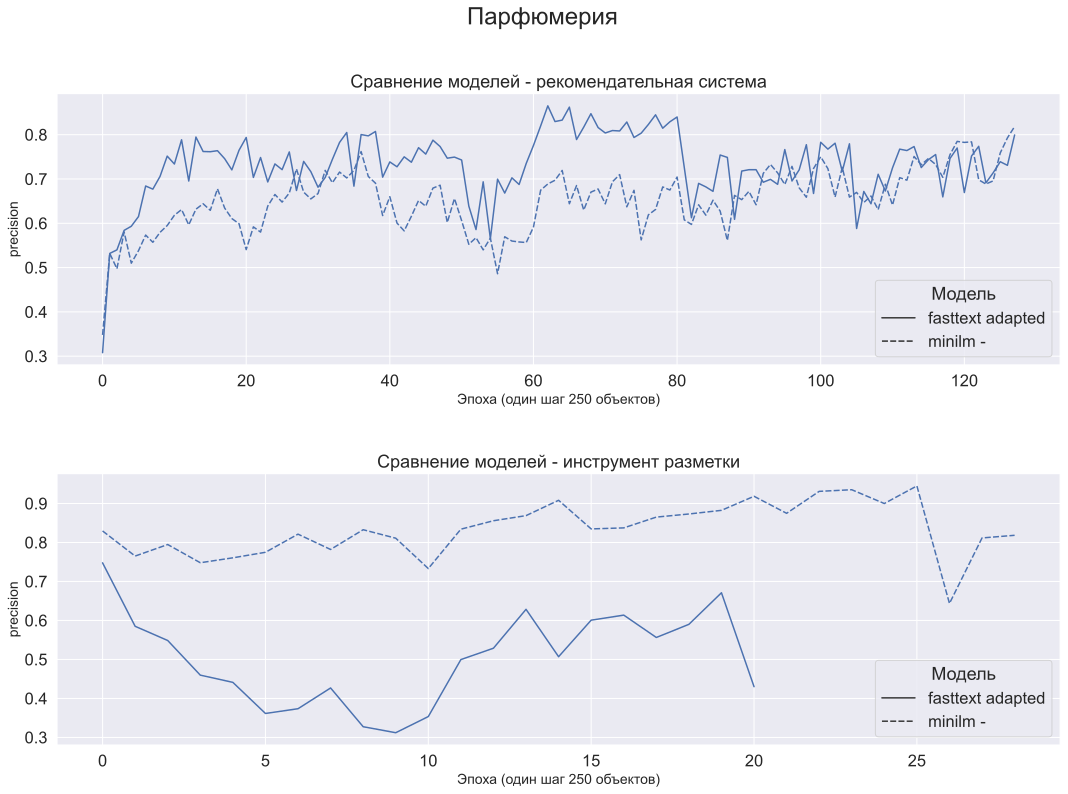

In [148]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
palette = sns.color_palette("Reds", as_cmap=True)


sns.lineplot(x="index", y="precision", data=all_, ax=ax[0], style='model', palette=palette)
ax[0].set_title('Сравнение моделей - рекомендательная система', fontsize=18)
ax[0].set_xlabel('Эпоха (один шаг 250 объектов)', fontsize=14)
ax[0].set_ylabel('precision', fontsize=14)
ax[0].legend(title='Модель')
# mean = all_fasttext.precision.mean()
# ax[0].plot([0, max(all_.index / 2)], [mean, mean])

sns.lineplot(x="index", y="precision", style='model', data=model, ax=ax[1])
ax[1].set_title('Сравнение моделей - инструмент разметки', fontsize=18)
ax[1].set_xlabel('Эпоха (один шаг 250 объектов)', fontsize=14)
ax[1].set_ylabel('precision', fontsize=14)
ax[1].legend(title='Модель')

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Парфюмерия", fontsize=24)
plt.savefig('saved_figure.jpg')
plt.show()